In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df =  pd.read_csv("/Users/nikhitaturimella/Downloads/Insurance_complaints__All_data.csv")
df.head()

,Complaint number,Complaint filed against,Complaint filed by,Reason complaint filed,Confirmed complaint,How resolved,Received date,Closed date,Complaint type,Coverage type,Coverage level,Others involved,Respondent ID,Respondent Role,Respondent type,Complainant type,Keywords
0,1,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Customer Service,No,Other,06/12/2012,07/25/2012,"Life, Accident and Health",Life & Annuity,Individual Life,NaN,13191,Ins Co - Licensed/Active,Organization,INDV,NaN
1,2,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,06/21/2012,08/01/2012,"Life, Accident and Health",Accident and Health,Group A&H,Insured,245,Ins Co - Licensed/Active,Organization,ORG,NaN
2,3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/11/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,NaN,10047,Ins Co - Licensed/Active,Organization,ORG,NaN
3,4,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/28/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,NaN,10047,Ins Co - Licensed/Active,Organization,ORG,NaN
4,5,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Question of Fact; Contract Language/Legal Issue,06/13/2012,07/17/2012,Property and Casualty,Automobile,Individual Private Pass,NaN,2918,Ins Co - Licensed/Active,Organization,INDV,2012 NORTH TEXAS TORNADOES; ADJUSTER'S HANDLIN...


In [3]:
df.shape

(246096, 17)

In [4]:
df.columns

Index(['Complaint number', 'Complaint filed against', 'Complaint filed by',
       'Reason complaint filed', 'Confirmed complaint', 'How resolved',
       'Received date', 'Closed date', 'Complaint type', 'Coverage type',
       'Coverage level', 'Others involved', 'Respondent ID', 'Respondent Role',
       'Respondent type', 'Complainant type', 'Keywords'],
      dtype='object')

In [5]:
missing_values_percentage = df.isnull().sum().to_frame("Missing values %") / len(df) * 100
missing_values_percentage.columns = ["Missing values %"]
missing_values_percentage

,Missing values %
Complaint number,0.000000
Complaint filed against,0.000000
Complaint filed by,0.000000
Reason complaint filed,0.002438
Confirmed complaint,0.000000
How resolved,0.415691
Received date,0.000000
Closed date,0.000000
Complaint type,0.000406
Coverage type,0.000000


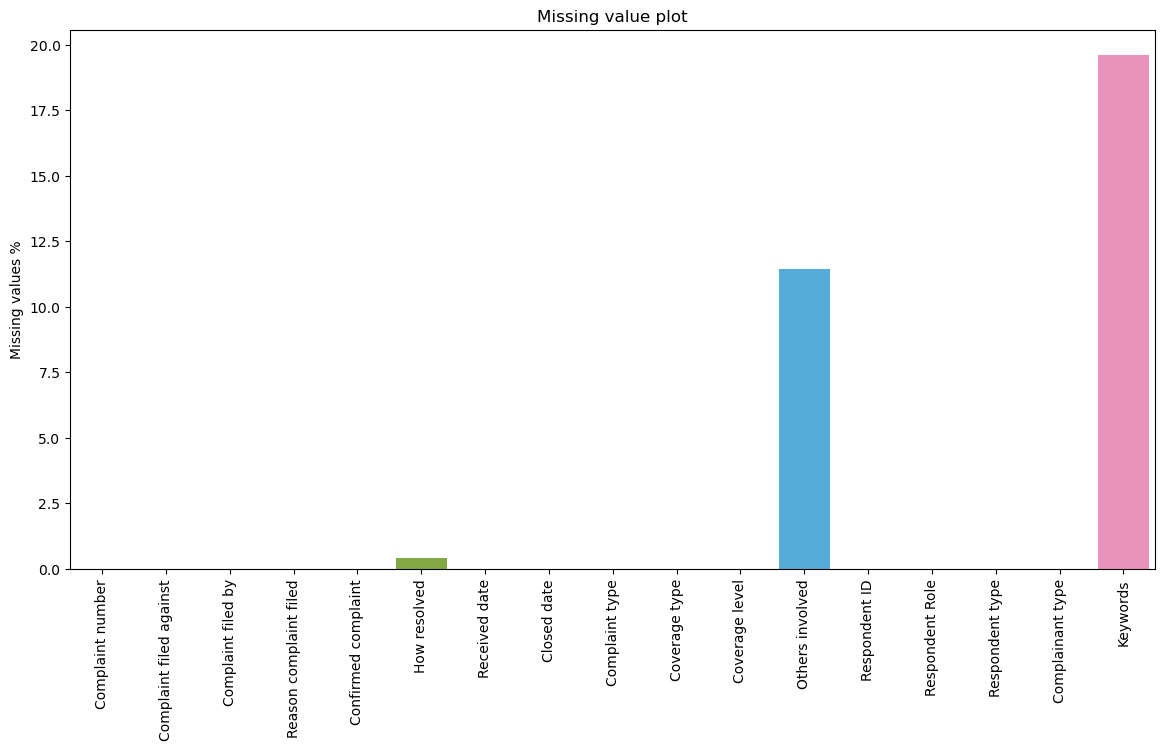

In [6]:
plt.figure(figsize=(14,7))
sns.barplot(x = missing_values_percentage.index , y = missing_values_percentage["Missing values %"])
plt.xticks(rotation = 90)
plt.title("Missing value plot")
plt.show()

In [7]:
# dropping the column with missing values
missing_columns = [i for i , j in zip(missing_values_percentage.index , missing_values_percentage["Missing values %"]) if j > 0]
for i in missing_columns:
    if df[i].dtype == "O":
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].median())

In [8]:
numerical_features = [i for i in df.columns if df[i].dtype != 'O']
categorical_features = [i for i in df.columns if df[i].dtype == 'O']

In [9]:
print("The number of numerical features in the dataset are {} and those are {}".format(len(numerical_features) , numerical_features))
print("The number of categorical features in the dataset are {} and those are {}".format(len(categorical_features) , categorical_features))

The number of numerical features in the dataset are 2 and those are ['Complaint number', 'Respondent ID']
The number of categorical features in the dataset are 15 and those are ['Complaint filed against', 'Complaint filed by', 'Reason complaint filed', 'Confirmed complaint', 'How resolved', 'Received date', 'Closed date', 'Complaint type', 'Coverage type', 'Coverage level', 'Others involved', 'Respondent Role', 'Respondent type', 'Complainant type', 'Keywords']


In [10]:
df.describe()

,Complaint number,Respondent ID
count,246096.000000,2.460960e+05
mean,190996.589912,4.663752e+04
std,111958.273870,2.060969e+05
min,1.000000,5.200000e+01
25%,94358.750000,1.348000e+03
50%,189110.500000,2.752000e+03
75%,292658.250000,1.019800e+04
max,386025.000000,2.858775e+06


In [11]:
for i in categorical_features:
    print(i)
    print(f"The number of unique value in {i} column - {len(df[i].unique())}")
    print('-'*35)

Complaint filed against
The number of unique value in Complaint filed against column - 15397
-----------------------------------
Complaint filed by
The number of unique value in Complaint filed by column - 31
-----------------------------------
Reason complaint filed
The number of unique value in Reason complaint filed column - 7682
-----------------------------------
Confirmed complaint
The number of unique value in Confirmed complaint column - 2
-----------------------------------
How resolved
The number of unique value in How resolved column - 3954
-----------------------------------
Received date
The number of unique value in Received date column - 3675
-----------------------------------
Closed date
The number of unique value in Closed date column - 3467
-----------------------------------
Complaint type
The number of unique value in Complaint type column - 17
-----------------------------------
Coverage type
The number of unique value in Coverage type column - 7
-----------------

In [12]:
df.isnull().sum()

Complaint number           0
Complaint filed against    0
Complaint filed by         0
Reason complaint filed     0
Confirmed complaint        0
How resolved               0
Received date              0
Closed date                0
Complaint type             0
Coverage type              0
Coverage level             0
Others involved            0
Respondent ID              0
Respondent Role            0
Respondent type            0
Complainant type           0
Keywords                   0
dtype: int64

In [13]:
df

,Complaint number,Complaint filed against,Complaint filed by,Reason complaint filed,Confirmed complaint,How resolved,Received date,Closed date,Complaint type,Coverage type,Coverage level,Others involved,Respondent ID,Respondent Role,Respondent type,Complainant type,Keywords
0,1,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Customer Service,No,Other,06/12/2012,07/25/2012,"Life, Accident and Health",Life & Annuity,Individual Life,Portal - Company; Portal - Insured,13191,Ins Co - Licensed/Active,Organization,INDV,CLAIM EVALUATION
1,2,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,06/21/2012,08/01/2012,"Life, Accident and Health",Accident and Health,Group A&H,Insured,245,Ins Co - Licensed/Active,Organization,ORG,CLAIM EVALUATION
2,3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/11/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,Portal - Company; Portal - Insured,10047,Ins Co - Licensed/Active,Organization,ORG,CLAIM EVALUATION
3,4,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/28/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,Portal - Company; Portal - Insured,10047,Ins Co - Licensed/Active,Organization,ORG,CLAIM EVALUATION
4,5,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Question of Fact; Contract Language/Legal Issue,06/13/2012,07/17/2012,Property and Casualty,Automobile,Individual Private Pass,Portal - Company; Portal - Insured,2918,Ins Co - Licensed/Active,Organization,INDV,2012 NORTH TEXAS TORNADOES; ADJUSTER'S HANDLIN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246091,385449,"WellCare of Texas, Inc.",Insured,Delays (Policyholder Service); Delays In Autho...,No,Record Only; Referred To; No Jurisdiction,02/15/2024,02/15/2024,Medicare Managed Care for HMO,Accident and Health,Group A&H,Portal - Company; Portal - Insured,28079,Health Maintenance Org,Organization,INDV,CLAIM EVALUATION
246092,385839,Auto Club County Mutual Insurance Company,Third Party,Unsatisfactory Settle/Offer,No,Record Only,02/20/2024,02/20/2024,Property and Casualty,Automobile,Individual Private Pass,Insured; Portal - Insured; Portal - Other Company,2286,Ins Co - Licensed/Active,Organization,INDV,ADJUSTER'S HANDLING; DIMINISHED VALUE; LOSS OF...
246093,385960,Rockport Auto Claims,Other,Liability Dispute,No,Referred To; No Jurisdiction,02/21/2024,02/21/2024,Property and Casualty,Automobile,Individual Private Pass,Portal - Insured; Portal - Other,165587,Other,Organization,INDV,CLAIM EVALUATION
246094,385960,Ace-Roam Rent-a-Car,Other,Other,No,Referred To; No Jurisdiction,02/21/2024,02/21/2024,Property and Casualty,Automobile,Individual Private Pass,Portal - Insured; Portal - Other,211706,Other,Organization,INDV,CLAIM EVALUATION


In [14]:
df.drop(["Complaint number" , "Respondent ID"] , axis =1 , inplace = True)
df

,Complaint filed against,Complaint filed by,Reason complaint filed,Confirmed complaint,How resolved,Received date,Closed date,Complaint type,Coverage type,Coverage level,Others involved,Respondent Role,Respondent type,Complainant type,Keywords
0,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Customer Service,No,Other,06/12/2012,07/25/2012,"Life, Accident and Health",Life & Annuity,Individual Life,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,Organization,INDV,CLAIM EVALUATION
1,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,06/21/2012,08/01/2012,"Life, Accident and Health",Accident and Health,Group A&H,Insured,Ins Co - Licensed/Active,Organization,ORG,CLAIM EVALUATION
2,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/11/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,Organization,ORG,CLAIM EVALUATION
3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/28/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,Organization,ORG,CLAIM EVALUATION
4,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Question of Fact; Contract Language/Legal Issue,06/13/2012,07/17/2012,Property and Casualty,Automobile,Individual Private Pass,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,Organization,INDV,2012 NORTH TEXAS TORNADOES; ADJUSTER'S HANDLIN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246091,"WellCare of Texas, Inc.",Insured,Delays (Policyholder Service); Delays In Autho...,No,Record Only; Referred To; No Jurisdiction,02/15/2024,02/15/2024,Medicare Managed Care for HMO,Accident and Health,Group A&H,Portal - Company; Portal - Insured,Health Maintenance Org,Organization,INDV,CLAIM EVALUATION
246092,Auto Club County Mutual Insurance Company,Third Party,Unsatisfactory Settle/Offer,No,Record Only,02/20/2024,02/20/2024,Property and Casualty,Automobile,Individual Private Pass,Insured; Portal - Insured; Portal - Other Company,Ins Co - Licensed/Active,Organization,INDV,ADJUSTER'S HANDLING; DIMINISHED VALUE; LOSS OF...
246093,Rockport Auto Claims,Other,Liability Dispute,No,Referred To; No Jurisdiction,02/21/2024,02/21/2024,Property and Casualty,Automobile,Individual Private Pass,Portal - Insured; Portal - Other,Other,Organization,INDV,CLAIM EVALUATION
246094,Ace-Roam Rent-a-Car,Other,Other,No,Referred To; No Jurisdiction,02/21/2024,02/21/2024,Property and Casualty,Automobile,Individual Private Pass,Portal - Insured; Portal - Other,Other,Organization,INDV,CLAIM EVALUATION


In [15]:
categorical_columns =[]
for i in categorical_features:
    print(f"The categorical feature {i} has {len(df[i].unique())}")
    if len(df[i].unique()) < 20 :
        categorical_columns.append(i)

The categorical feature Complaint filed against has 15397
The categorical feature Complaint filed by has 31
The categorical feature Reason complaint filed has 7682
The categorical feature Confirmed complaint has 2
The categorical feature How resolved has 3954
The categorical feature Received date has 3675
The categorical feature Closed date has 3467
The categorical feature Complaint type has 17
The categorical feature Coverage type has 7
The categorical feature Coverage level has 68
The categorical feature Others involved has 6822
The categorical feature Respondent Role has 51
The categorical feature Respondent type has 2
The categorical feature Complainant type has 2
The categorical feature Keywords has 7329


In [16]:
print(f"The categorical column which have less that 10 unique values are {len(categorical_columns)} and those are {categorical_columns}")

The categorical column which have less that 10 unique values are 5 and those are ['Confirmed complaint', 'Complaint type', 'Coverage type', 'Respondent type', 'Complainant type']


/var/folders/sq/hr_zby6d2sx43y3z40c3f5200000gn/T/ipykernel_6856/2331027717.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/sq/hr_zby6d2sx43y3z40c3f5200000gn/T/ipykernel_6856/2331027717.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/sq/hr_zby6d2sx43y3z40c3f5200000gn/T/ipykernel_6856/2331027717.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/sq/hr_zby6d2sx43y3z40c3f5200000gn/T/ipykernel_6856/2331027717.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


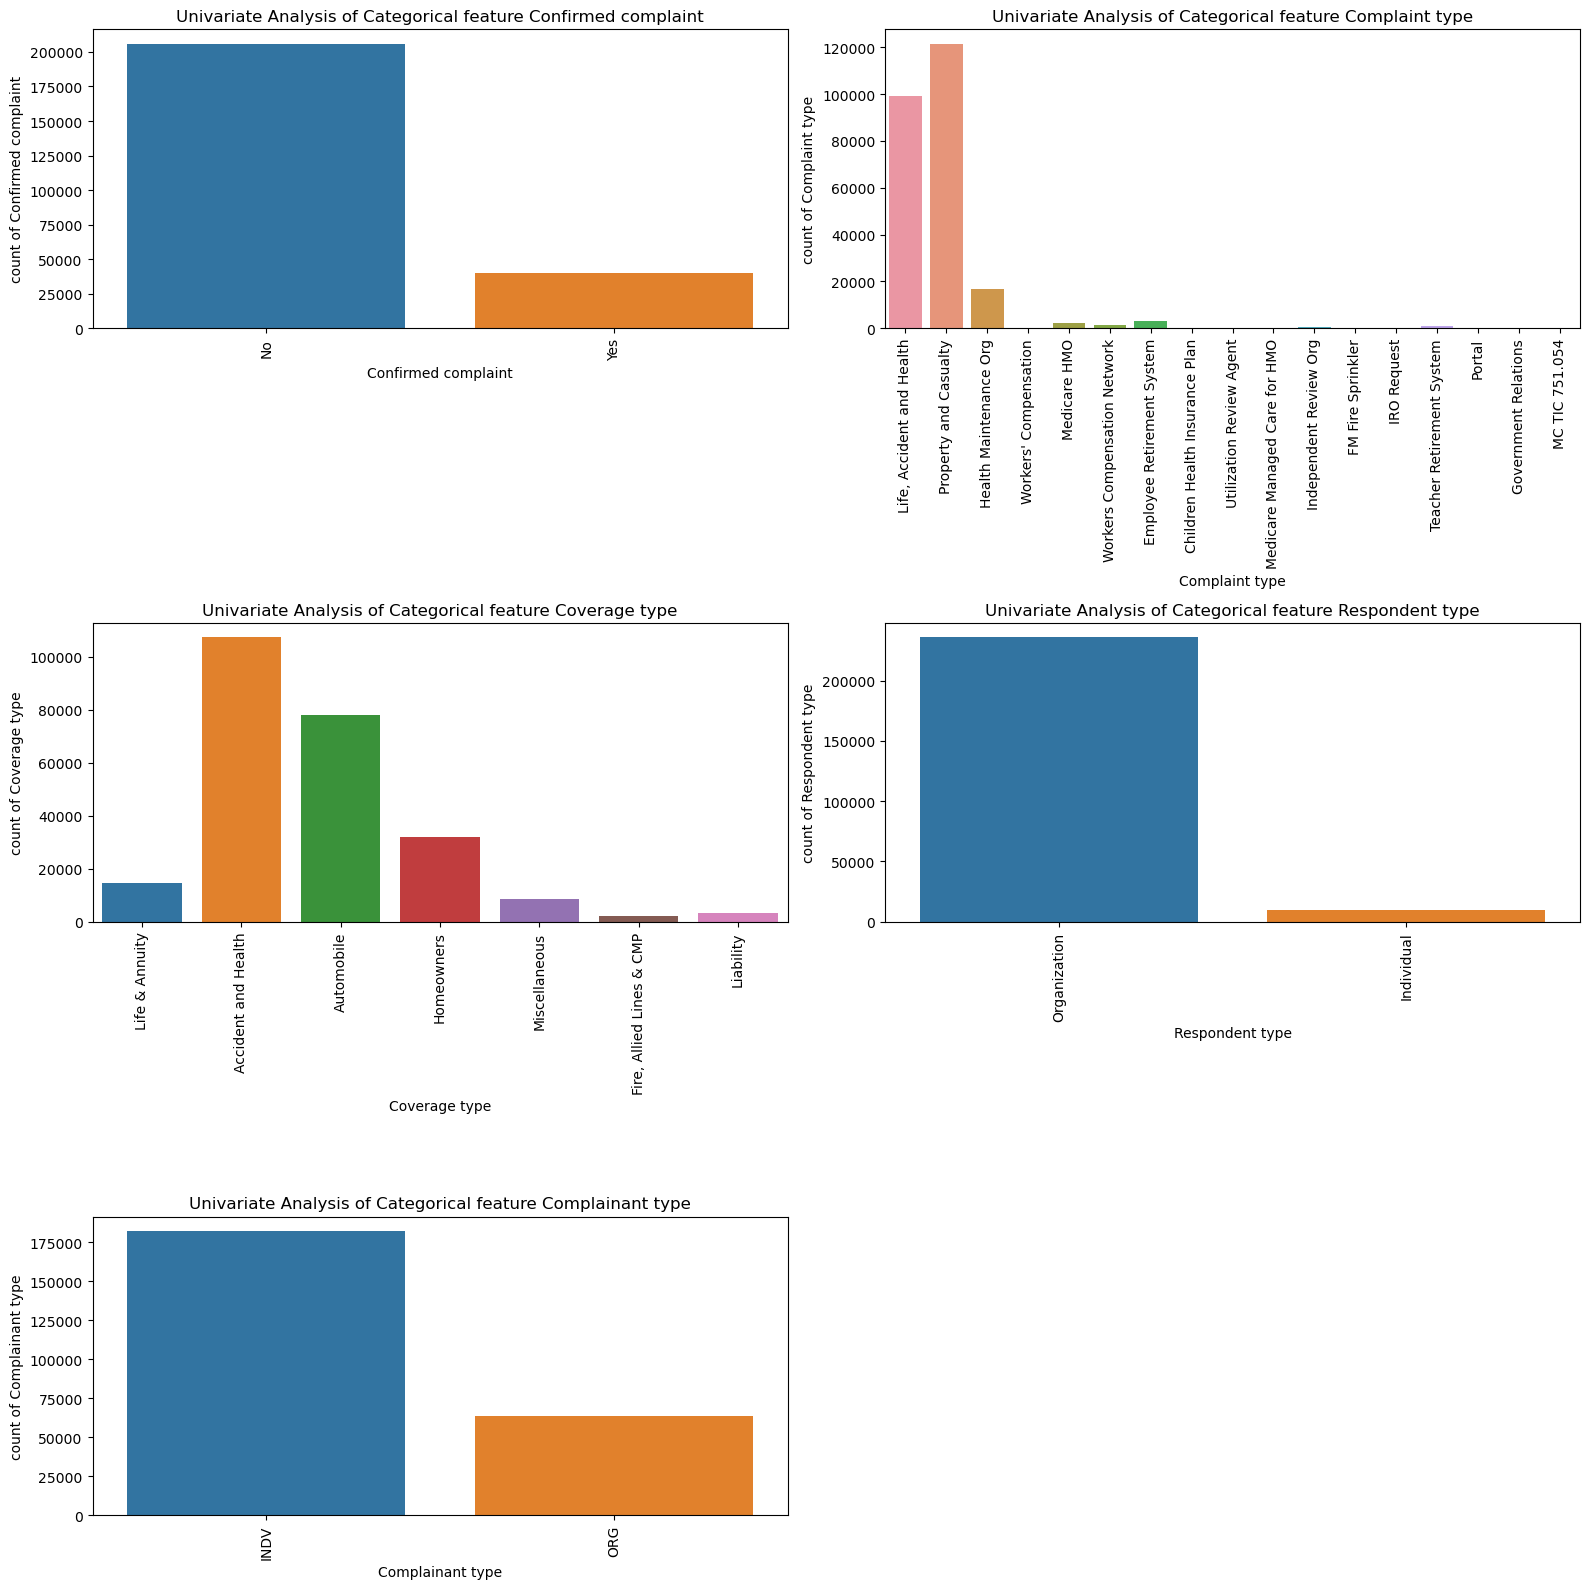

In [17]:
plt.figure(figsize=(16,16))
for i in range(len(categorical_columns)):
    plt.subplot(3 , 2 , i+1)
    sns.countplot(x = categorical_columns[i] , data = df)
    plt.xlabel(categorical_columns[i])
    plt.ylabel(f'count of {categorical_columns[i]}')
    plt.xticks(rotation = 90)
    plt.title(f'Univariate Analysis of Categorical feature {categorical_columns[i]}')
    plt.tight_layout()

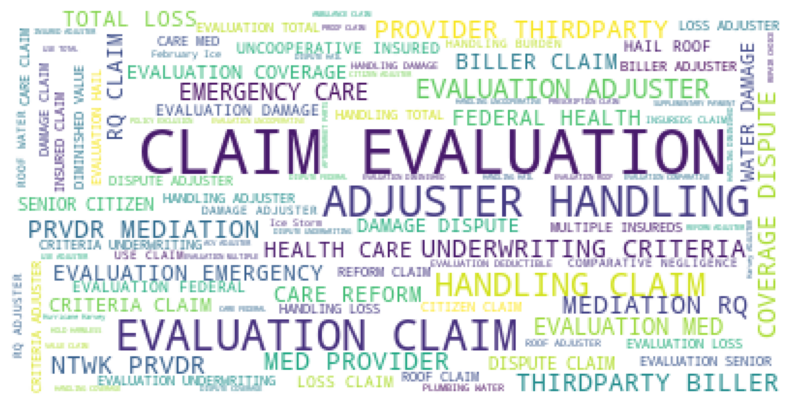

In [18]:
text = ' '.join(df['Keywords'].astype(str))

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
# date time columns - Received date	Closed date
df["Received date"] = pd.to_datetime(df["Received date"])
df["Closed date"] = pd.to_datetime(df["Closed date"])
df["time_taken_to_close"] = df["Closed date"] - df["Received date"]

for i in ["Received date","Closed date"]:
    df[f"{i}_year"] = df[i].dt.year
    df[f"{i}_month"] = df[i].dt.month
    df[f"{i}_day"] = df[i].dt.day
    df[f"{i}_month_year"] = df[i].dt.strftime('%Y%m').astype(int)
    df[f"{i}_quarter"] = df[i].dt.quarter

In [20]:
df.drop(["Received date" , 	"Closed date"] , axis = 1 , inplace = True)

In [21]:
df

,Complaint filed against,Complaint filed by,Reason complaint filed,Confirmed complaint,How resolved,Complaint type,Coverage type,Coverage level,Others involved,Respondent Role,...,Received date_year,Received date_month,Received date_day,Received date_month_year,Received date_quarter,Closed date_year,Closed date_month,Closed date_day,Closed date_month_year,Closed date_quarter
0,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Customer Service,No,Other,"Life, Accident and Health",Life & Annuity,Individual Life,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,...,2012,6,12,201206,2,2012,7,25,201207,3
1,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,"Life, Accident and Health",Accident and Health,Group A&H,Insured,Ins Co - Licensed/Active,...,2012,6,21,201206,2,2012,8,1,201208,3
2,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,"Life, Accident and Health",Accident and Health,Group A&H,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,...,2012,6,11,201206,2,2012,7,30,201207,3
3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,"Life, Accident and Health",Accident and Health,Group A&H,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,...,2012,6,28,201206,2,2012,7,30,201207,3
4,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Question of Fact; Contract Language/Legal Issue,Property and Casualty,Automobile,Individual Private Pass,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,...,2012,6,13,201206,2,2012,7,17,201207,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246091,"WellCare of Texas, Inc.",Insured,Delays (Policyholder Service); Delays In Autho...,No,Record Only; Referred To; No Jurisdiction,Medicare Managed Care for HMO,Accident and Health,Group A&H,Portal - Company; Portal - Insured,Health Maintenance Org,...,2024,2,15,202402,1,2024,2,15,202402,1
246092,Auto Club County Mutual Insurance Company,Third Party,Unsatisfactory Settle/Offer,No,Record Only,Property and Casualty,Automobile,Individual Private Pass,Insured; Portal - Insured; Portal - Other Company,Ins Co - Licensed/Active,...,2024,2,20,202402,1,2024,2,20,202402,1
246093,Rockport Auto Claims,Other,Liability Dispute,No,Referred To; No Jurisdiction,Property and Casualty,Automobile,Individual Private Pass,Portal - Insured; Portal - Other,Other,...,2024,2,21,202402,1,2024,2,21,202402,1
246094,Ace-Roam Rent-a-Car,Other,Other,No,Referred To; No Jurisdiction,Property and Casualty,Automobile,Individual Private Pass,Portal - Insured; Portal - Other,Other,...,2024,2,21,202402,1,2024,2,21,202402,1


In [22]:
categorical_features = [i for i in df.columns if df[i].dtype == 'O']
print("The number of categorical features in the dataset are {} and those are {}".format(len(categorical_features) , categorical_features))

The number of categorical features in the dataset are 13 and those are ['Complaint filed against', 'Complaint filed by', 'Reason complaint filed', 'Confirmed complaint', 'How resolved', 'Complaint type', 'Coverage type', 'Coverage level', 'Others involved', 'Respondent Role', 'Respondent type', 'Complainant type', 'Keywords']


In [23]:
for i in categorical_features:
    group_df = df.groupby(i).size().to_frame()
    group_df.columns = ["Count of each type"]
    top_10_types = group_df.sort_values(by="Count of each type", ascending=False).head(10)

    # Print the results
    print(f"Top 10 types in {i}:")
    print(top_10_types)
    print("\n" + "-"*50 + "\n")

Top 10 types in Complaint filed against:
                                                    Count of each type
Complaint filed against                                               
Blue Cross and Blue Shield of Texas, A Division...               19921
UnitedHealthcare Insurance Company                               15203
Aetna Life Insurance Company                                      9234
PROGRESSIVE COUNTY MUTUAL INSURANCE COMPANY                       6501
State Farm Mutual Automobile Insurance Company                    5222
ALLSTATE FIRE AND CASUALTY INSURANCE COMPANY                      4820
BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISION...                4249
GEICO County Mutual Insurance Company                             3382
OLD AMERICAN COUNTY MUTUAL FIRE INSURANCE COMPANY                 3254
United Healthcare Services, Inc.                                  3099

--------------------------------------------------

Top 10 types in Complaint filed by:
                  

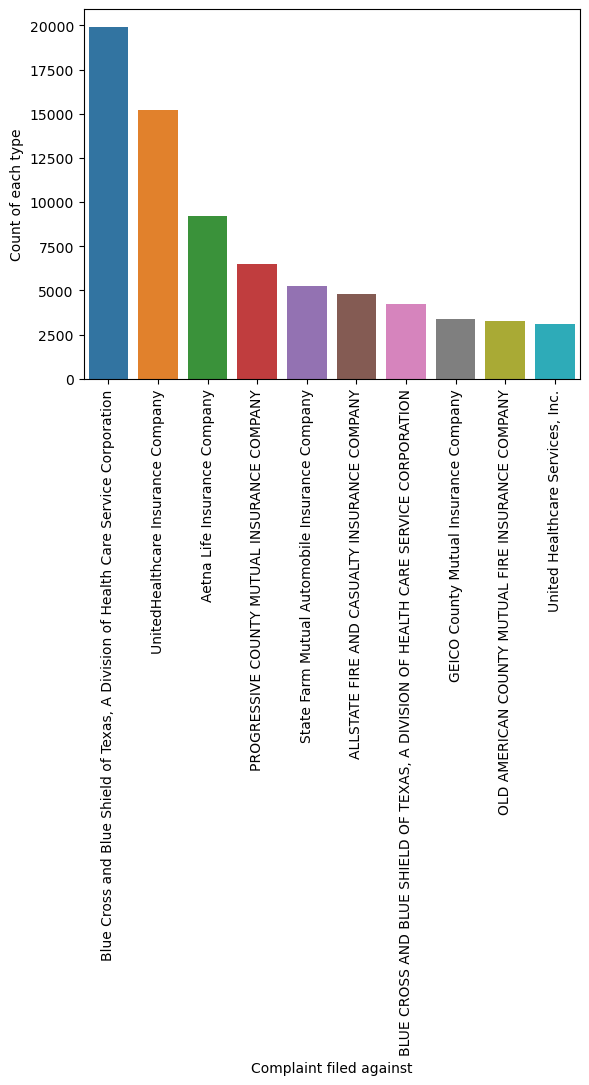

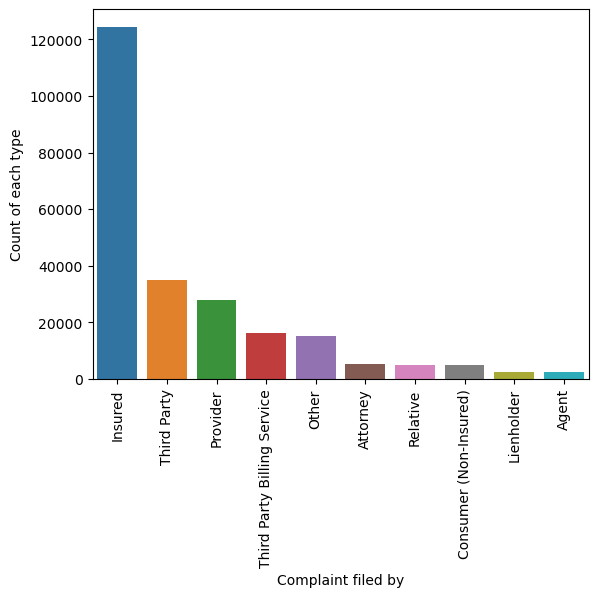

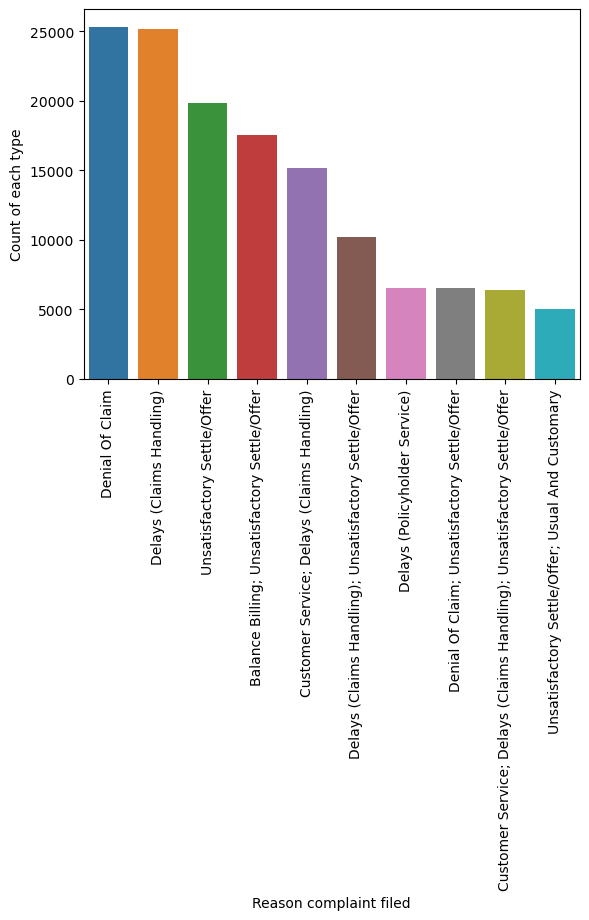

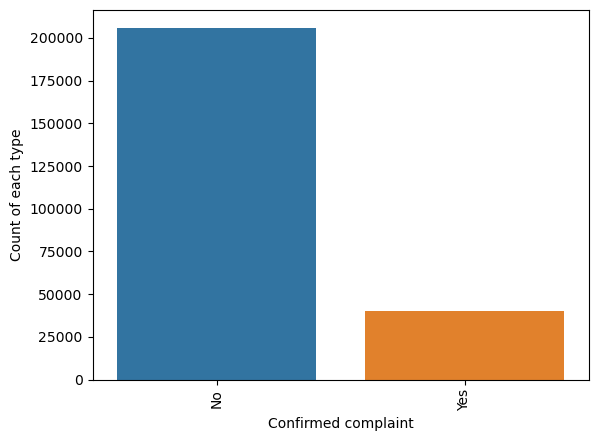

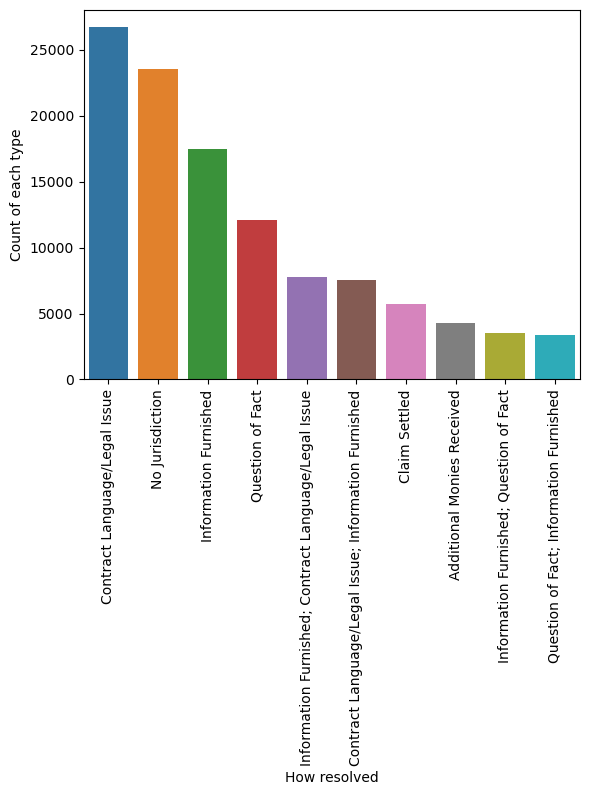

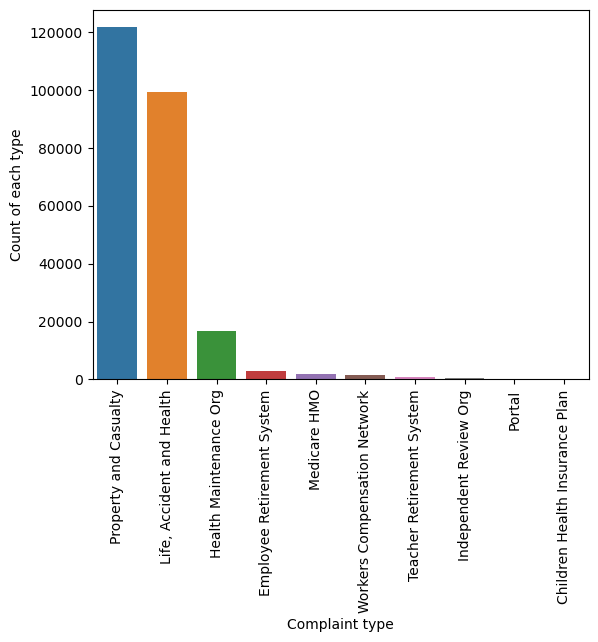

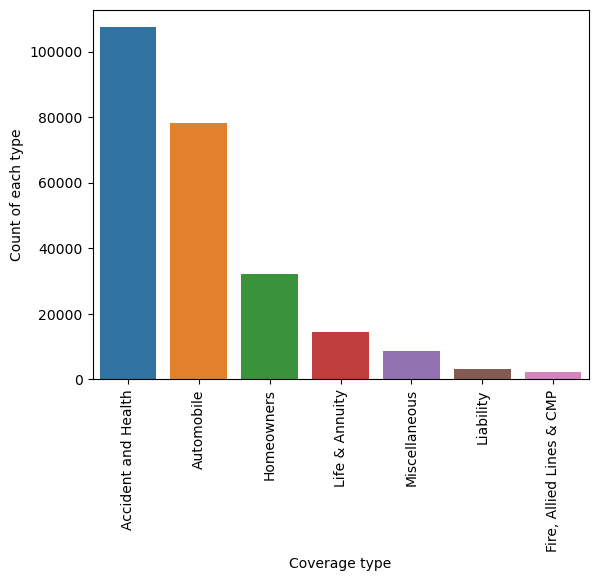

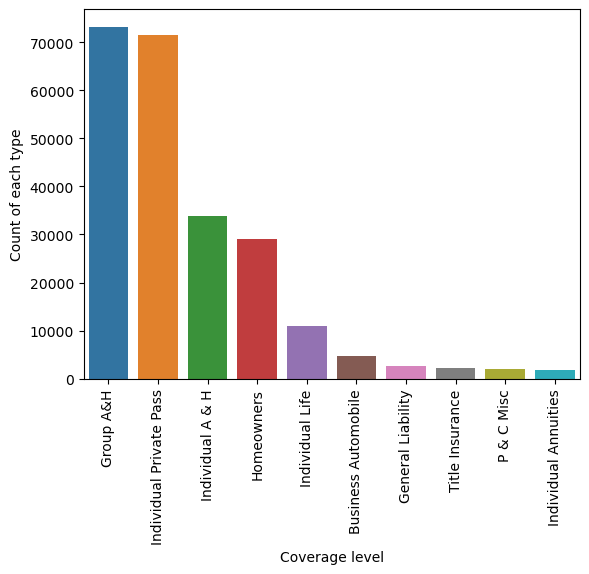

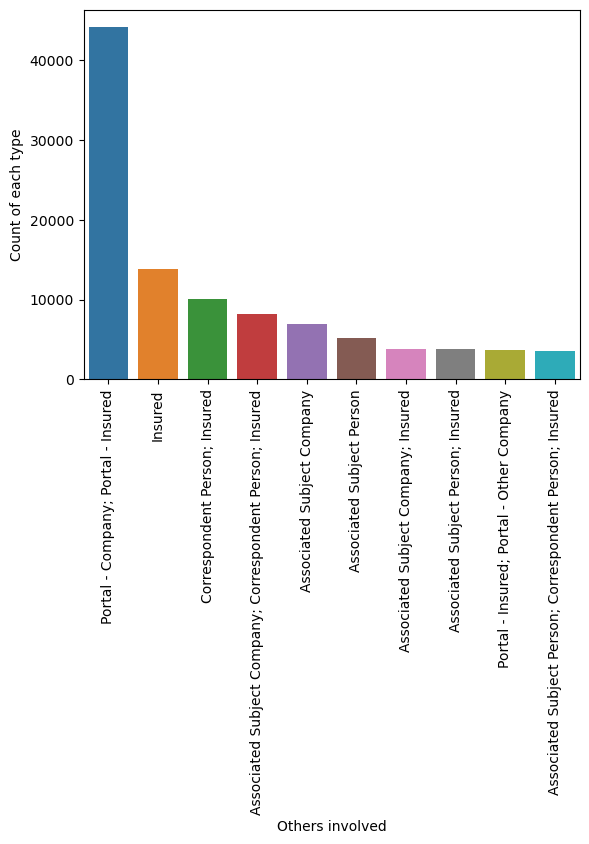

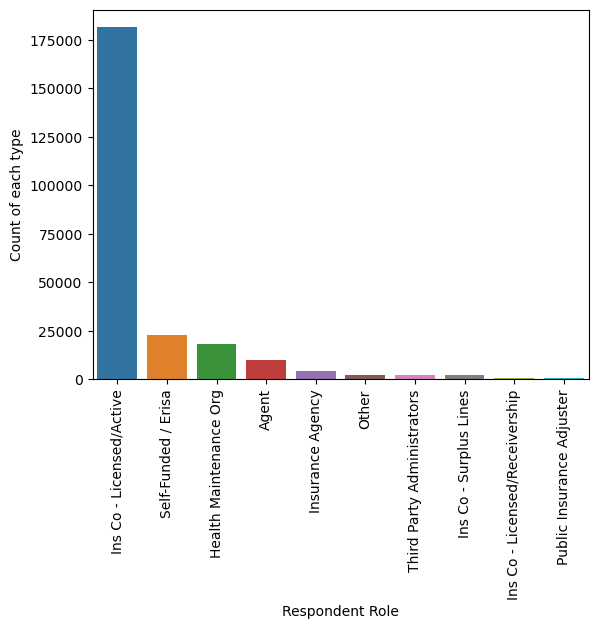

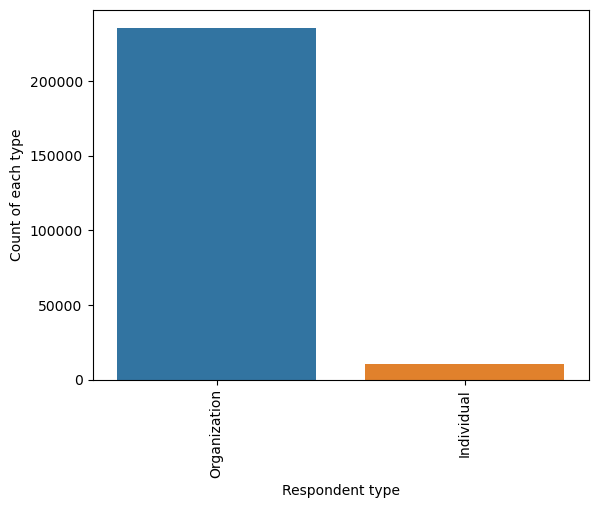

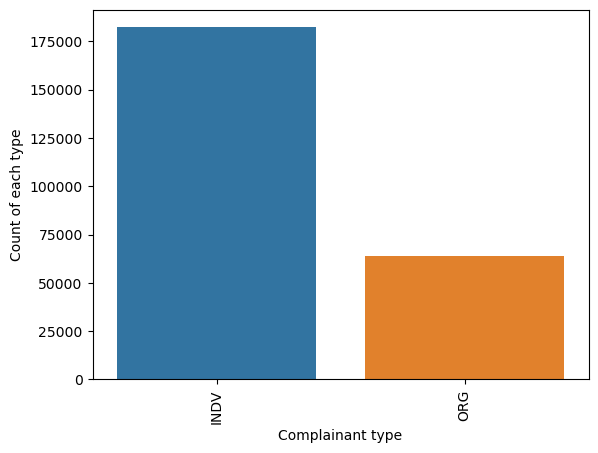

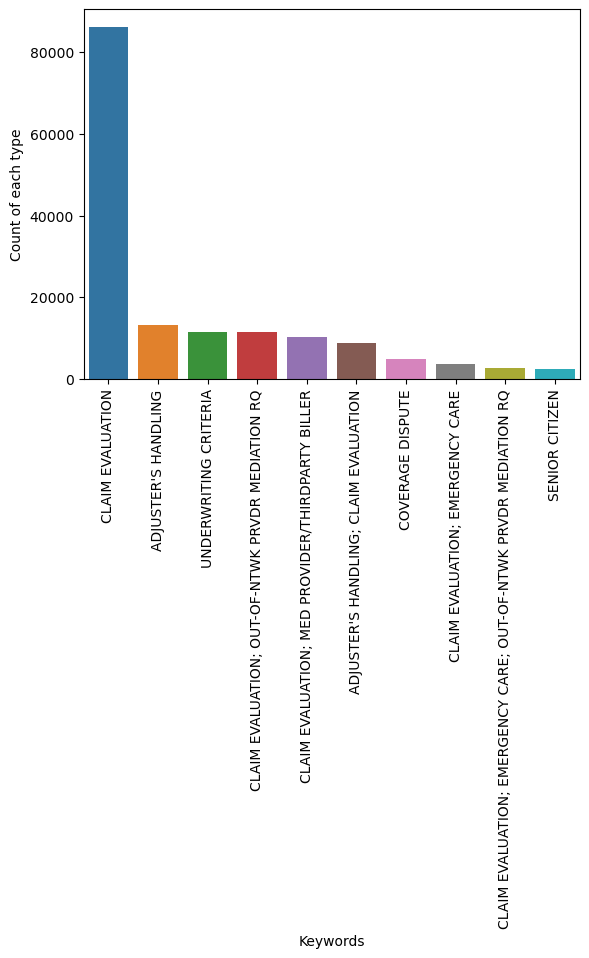

In [24]:
for i in categorical_features:
    group_df = df.groupby(i).size().to_frame()
    group_df.columns = ["Count of each type"]
    top_10_types = group_df.sort_values(by="Count of each type", ascending=False).head(10)
    sns.barplot(x = top_10_types.index , y = top_10_types["Count of each type"])
    plt.xticks(rotation = 90)
    plt.show()

In [25]:
df

,Complaint filed against,Complaint filed by,Reason complaint filed,Confirmed complaint,How resolved,Complaint type,Coverage type,Coverage level,Others involved,Respondent Role,...,Received date_year,Received date_month,Received date_day,Received date_month_year,Received date_quarter,Closed date_year,Closed date_month,Closed date_day,Closed date_month_year,Closed date_quarter
0,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Customer Service,No,Other,"Life, Accident and Health",Life & Annuity,Individual Life,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,...,2012,6,12,201206,2,2012,7,25,201207,3
1,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,"Life, Accident and Health",Accident and Health,Group A&H,Insured,Ins Co - Licensed/Active,...,2012,6,21,201206,2,2012,8,1,201208,3
2,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,"Life, Accident and Health",Accident and Health,Group A&H,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,...,2012,6,11,201206,2,2012,7,30,201207,3
3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,"Life, Accident and Health",Accident and Health,Group A&H,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,...,2012,6,28,201206,2,2012,7,30,201207,3
4,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Question of Fact; Contract Language/Legal Issue,Property and Casualty,Automobile,Individual Private Pass,Portal - Company; Portal - Insured,Ins Co - Licensed/Active,...,2012,6,13,201206,2,2012,7,17,201207,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246091,"WellCare of Texas, Inc.",Insured,Delays (Policyholder Service); Delays In Autho...,No,Record Only; Referred To; No Jurisdiction,Medicare Managed Care for HMO,Accident and Health,Group A&H,Portal - Company; Portal - Insured,Health Maintenance Org,...,2024,2,15,202402,1,2024,2,15,202402,1
246092,Auto Club County Mutual Insurance Company,Third Party,Unsatisfactory Settle/Offer,No,Record Only,Property and Casualty,Automobile,Individual Private Pass,Insured; Portal - Insured; Portal - Other Company,Ins Co - Licensed/Active,...,2024,2,20,202402,1,2024,2,20,202402,1
246093,Rockport Auto Claims,Other,Liability Dispute,No,Referred To; No Jurisdiction,Property and Casualty,Automobile,Individual Private Pass,Portal - Insured; Portal - Other,Other,...,2024,2,21,202402,1,2024,2,21,202402,1
246094,Ace-Roam Rent-a-Car,Other,Other,No,Referred To; No Jurisdiction,Property and Casualty,Automobile,Individual Private Pass,Portal - Insured; Portal - Other,Other,...,2024,2,21,202402,1,2024,2,21,202402,1


In [26]:
One_hot_columns  = [i for i in categorical_features if len(df[i].unique()) < 20]
One_hot_columns

['Confirmed complaint',
 'Complaint type',
 'Coverage type',
 'Respondent type',
 'Complainant type']

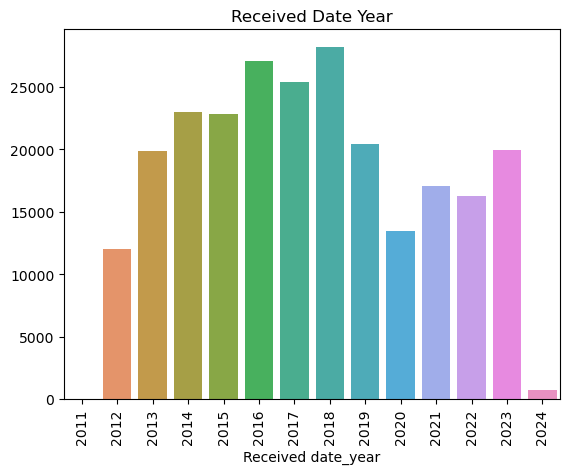

In [27]:
sns.barplot(x = df["Received date_year"].value_counts().index , y = df["Received date_year"].value_counts().values)
plt.xticks(rotation = 90)
plt.title("Received Date Year")
plt.show()

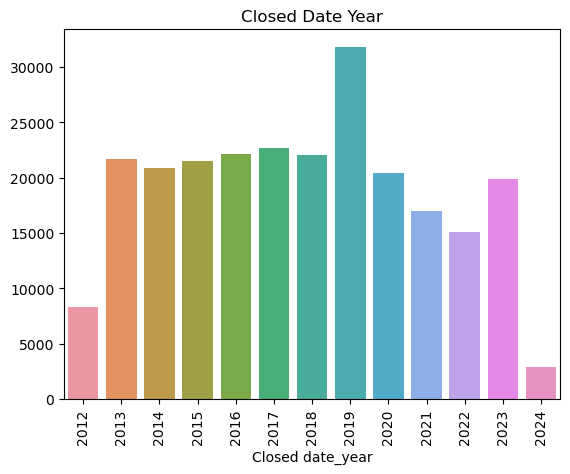

In [28]:
sns.barplot(x = df["Closed date_year"].value_counts().index , y = df["Closed date_year"].value_counts().values)
plt.xticks(rotation = 90)
plt.title("Closed Date Year")
plt.show()

In [29]:
df.dtypes

Complaint filed against              object
Complaint filed by                   object
Reason complaint filed               object
Confirmed complaint                  object
How resolved                         object
Complaint type                       object
Coverage type                        object
Coverage level                       object
Others involved                      object
Respondent Role                      object
Respondent type                      object
Complainant type                     object
Keywords                             object
time_taken_to_close         timedelta64[ns]
Received date_year                    int32
Received date_month                   int32
Received date_day                     int32
Received date_month_year              int64
Received date_quarter                 int32
Closed date_year                      int32
Closed date_month                     int32
Closed date_day                       int32
Closed date_month_year          

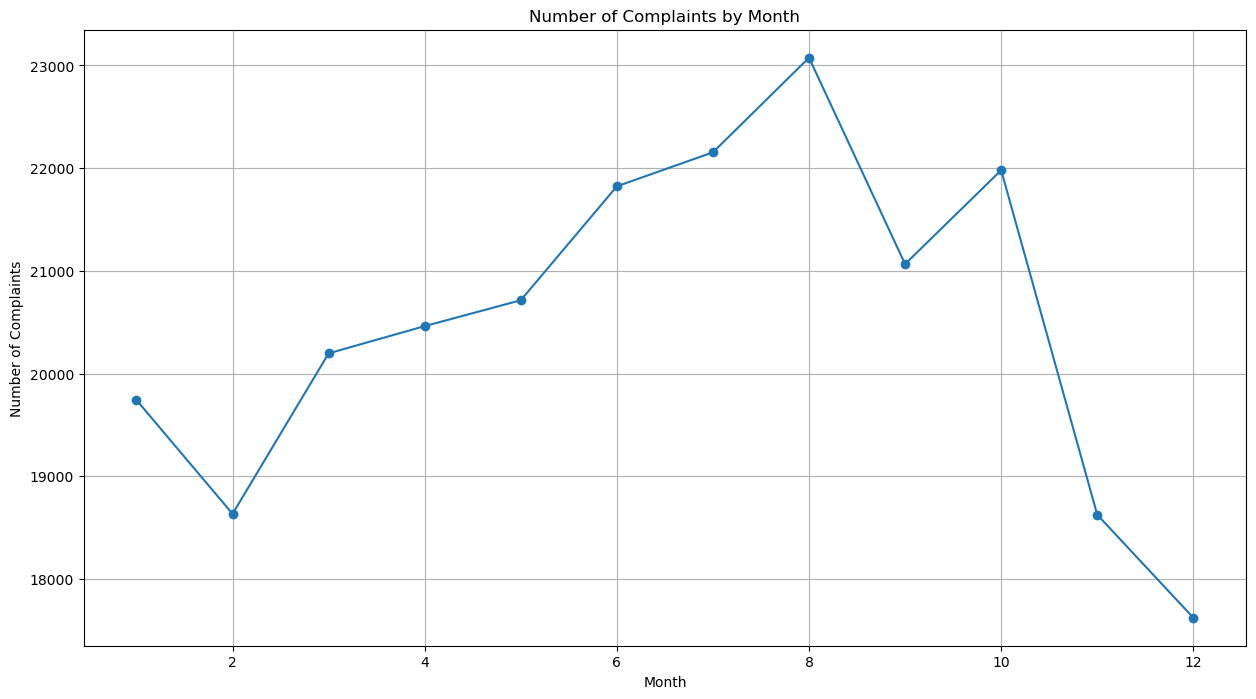

In [30]:
# Aggregate complaints by month
monthly_complaints = df.groupby(df["Received date_month"]).size()

# Plotting
plt.figure(figsize=(15, 8))
monthly_complaints.plot(kind='line', marker='o')
plt.title('Number of Complaints by Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()

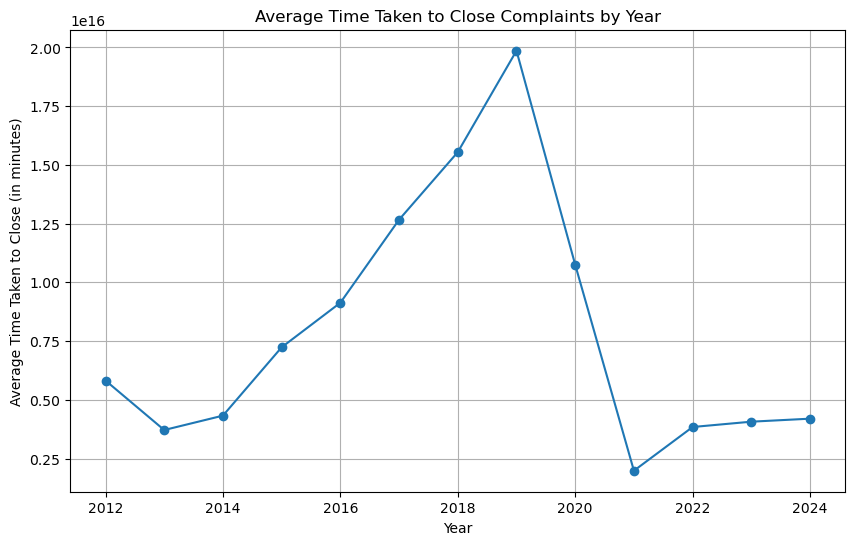

In [31]:
# Aggregate time taken to close complaints by year
time_to_close_by_year = df.groupby(df["Closed date_year"])["time_taken_to_close"].mean()

# Plotting
plt.figure(figsize=(10, 6))
time_to_close_by_year.plot(kind='line', marker='o')
plt.title('Average Time Taken to Close Complaints by Year')
plt.xlabel('Year')
plt.ylabel('Average Time Taken to Close (in minutes)')
plt.grid(True)
plt.show()

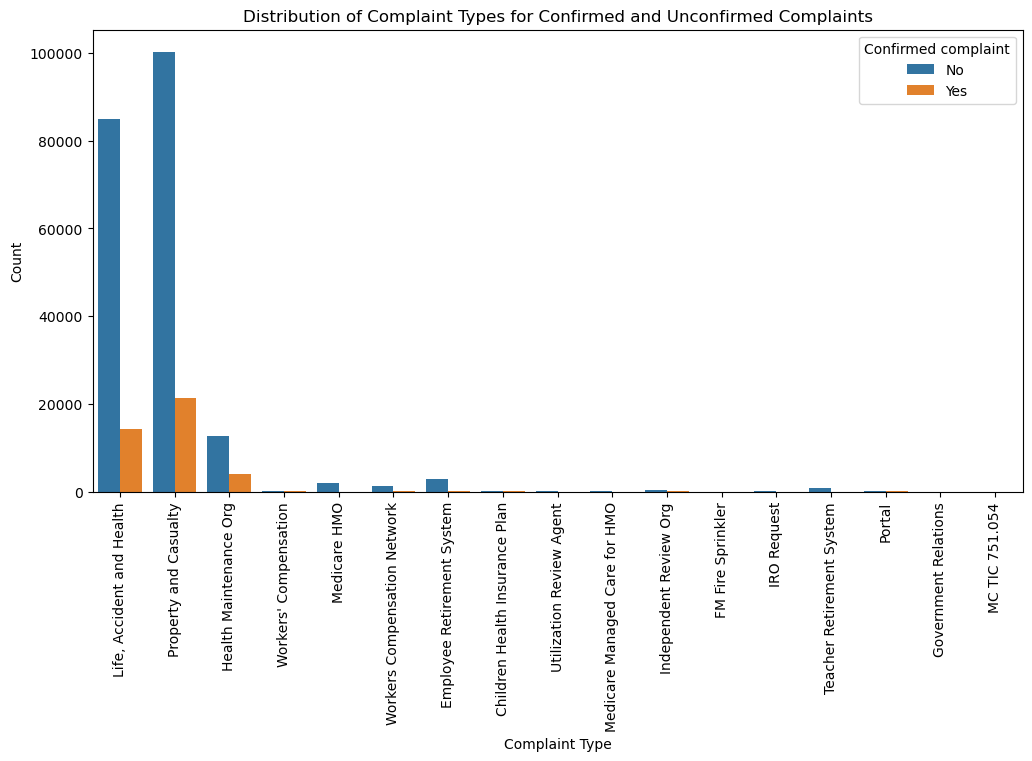

In [32]:
# 1. Differences in reasons for filing complaints between confirmed and unconfirmed complaints
confirmed_complaints = df[df['Confirmed complaint'] == 'Yes']
unconfirmed_complaints = df[df['Confirmed complaint'] == 'No']

plt.figure(figsize=(12, 6))
sns.countplot(x='Complaint type', hue='Confirmed complaint', data=df)
plt.title('Distribution of Complaint Types for Confirmed and Unconfirmed Complaints')
plt.xticks(rotation=90)
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.show()

In [33]:
# 2. Average time taken to resolve a complaint
average_time_to_resolve = df['time_taken_to_close'].mean()
print("Average Time Taken to Resolve a Complaint:", average_time_to_resolve, "minutes")

Average Time Taken to Resolve a Complaint: 105 days 09:11:09.514335872 minutes


In [34]:
# 3. Proportion of complaints resolved compared to those that remain unresolved
resolved_count = (df['Confirmed complaint'] == 'Yes').sum()
unresolved_count = (df['Confirmed complaint'] == 'No').sum()
total_complaints = len(df)

proportion_resolved = resolved_count / total_complaints
proportion_unresolved = unresolved_count / total_complaints

print("Proportion of Resolved Complaints:", proportion_resolved)
print("Proportion of Unresolved Complaints:", proportion_unresolved)

Proportion of Resolved Complaints: 0.1626316559391457
Proportion of Unresolved Complaints: 0.8373683440608543


In [35]:
df.dtypes

Complaint filed against              object
Complaint filed by                   object
Reason complaint filed               object
Confirmed complaint                  object
How resolved                         object
Complaint type                       object
Coverage type                        object
Coverage level                       object
Others involved                      object
Respondent Role                      object
Respondent type                      object
Complainant type                     object
Keywords                             object
time_taken_to_close         timedelta64[ns]
Received date_year                    int32
Received date_month                   int32
Received date_day                     int32
Received date_month_year              int64
Received date_quarter                 int32
Closed date_year                      int32
Closed date_month                     int32
Closed date_day                       int32
Closed date_month_year          

In [36]:
from sklearn.preprocessing import LabelEncoder
for i in categorical_features:
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])

In [37]:
df["time_taken_to_close"] = df['time_taken_to_close'].dt.total_seconds() / 60.0

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(['Complaint type'], axis=1) # Features
y = df['Complaint type'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , f1_score , recall_score , precision_score,roc_auc_score
from xgboost import XGBClassifier

In [42]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [43]:
def evaluate_metrics(true_label, predicted_label):
    accuracy = accuracy_score(true_label, predicted_label)
    recall = recall_score(true_label , predicted_label , average = 'micro')
    precision = precision_score(true_label , predicted_label , average = 'micro')
    f1 = f1_score(true_label , predicted_label, average = 'micro')

    return accuracy , recall , precision , f1

In [44]:
def model_evaluation(x_train , x_test , y_train , y_test, models):
    model_list = []
    accuracy_list = []
    auc_list = []

    for i in range(len(models)):
        model = list(models.values())[i]

        # training the model
        model.fit(x_train , y_train)

        # Prediction of the trtaining data
        y_train_prediction = model.predict(x_train)
        y_test_prediction = model.predict(x_test)

        #  Classfication matric for the training data

        train_accuracy , train_recall , train_precision , train_f1  = evaluate_metrics(y_train , y_train_prediction)

        # Classfication metric for testing data

        test_accuracy , test_recall , test_precision , test_f1  = evaluate_metrics(y_test , y_test_prediction)
        
            
        print(list(models.keys())[i])

        model_list.append(list(models.keys())[i])

        print("Model Performance on training data : ")
        print("Accuracy Score: ", train_accuracy)
        print("Recall Score: ", train_recall)
        print("Precision Score: ", train_precision)
        print("F1 Score: ", train_f1)

        print("-"*35)

        print("Model Performance on testing data : ")
        print("Accuracy Score: ", test_accuracy)
        accuracy_list.append(test_accuracy)
        print("Recall Score: ", test_recall)
        print("Precision Score: ", test_precision)
        print("F1 Score: ", test_f1)
        
        print("="*35)
        print("\n")

    performance_report = pd.DataFrame(list(zip(model_list , accuracy_list)) ,columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)

    return performance_report

In [45]:
performance_report = model_evaluation(X_train , X_test , y_train , y_test, models)

Random Forest
Model Performance on training data : 
Accuracy Score:  0.9997561917145817
Recall Score:  0.9997561917145817
Precision Score:  0.9997561917145817
F1 Score:  0.9997561917145817
-----------------------------------
Model Performance on testing data : 
Accuracy Score:  0.9764120276310443
Recall Score:  0.9764120276310443
Precision Score:  0.9764120276310443
F1 Score:  0.9764120276310443


Decision Tree
Model Performance on training data : 
Accuracy Score:  0.9997714297324204
Recall Score:  0.9997714297324204
Precision Score:  0.9997714297324204
F1 Score:  0.9997714297324204
-----------------------------------
Model Performance on testing data : 
Accuracy Score:  0.960503860219423
Recall Score:  0.960503860219423
Precision Score:  0.960503860219423
F1 Score:  0.960503860219423


Gradient Boosting
Model Performance on training data : 
Accuracy Score:  0.9485107377232369
Recall Score:  0.9485107377232369
Precision Score:  0.9485107377232369
F1 Score:  0.9485107377232369
---------

/Users/nikhitaturimella/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Performance on training data : 
Accuracy Score:  0.8062028891281822
Recall Score:  0.8062028891281822
Precision Score:  0.8062028891281822
F1 Score:  0.8062028891281822
-----------------------------------
Model Performance on testing data : 
Accuracy Score:  0.8052214546932142
Recall Score:  0.8052214546932142
Precision Score:  0.8052214546932142
F1 Score:  0.805221454693214


K-Neighbors Classifier
Model Performance on training data : 
Accuracy Score:  0.9258924399114163
Recall Score:  0.9258924399114163
Precision Score:  0.9258924399114163
F1 Score:  0.9258924399114163
-----------------------------------
Model Performance on testing data : 
Accuracy Score:  0.8942909386428282
Recall Score:  0.8942909386428282
Precision Score:  0.8942909386428282
F1 Score:  0.8942909386428282


XGBClassifier
Model Performance on training data : 
Accuracy Score:  0.9887848188707613
Recall Score:  0.9887848188707613
Precision Score:  0.9887848188707613
F1 Score:  0.988784818870

In [46]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Assuming X_train and y_train are your training features and target variable

# Fit linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Calculate R-squared
r_squared = regression_model.score(X_train, y_train)

# Calculate adjusted R-squared
n = len(y_train)
p = X_train.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Add a constant to the features for statsmodels
X_train_with_const = sm.add_constant(X_train)

# Fit OLS model (Ordinary Least Squares)
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Get summary which includes p-values
summary = ols_model.summary()

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)
print("Summary:")
print(summary)

R-squared: 0.40737321356377587
Adjusted R-squared: 0.40730397161506293
Summary:
                            OLS Regression Results                            
Dep. Variable:         Complaint type   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     6444.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        23:31:07   Log-Likelihood:            -4.4247e+05
No. Observations:              196876   AIC:                         8.850e+05
Df Residuals:                  196854   BIC:                         8.852e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

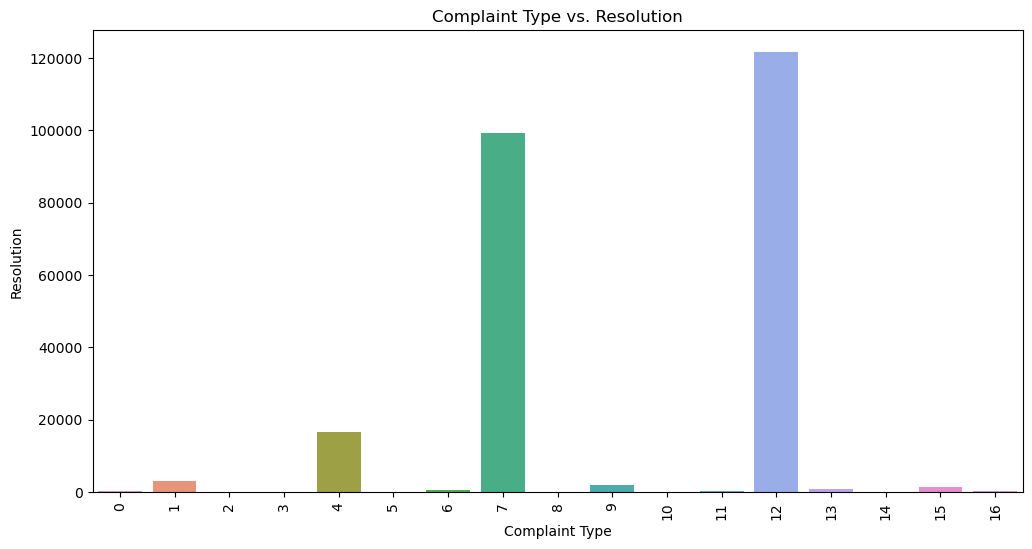

In [47]:
# Analyzing the impact of complaint type on resolution outcomes
plt.figure(figsize=(12, 6))
sns.countplot(x="Complaint type", data=df)
plt.title("Complaint Type vs. Resolution")
plt.xticks(rotation=90)
plt.xlabel('Complaint Type')
plt.ylabel('Resolution')
plt.show()

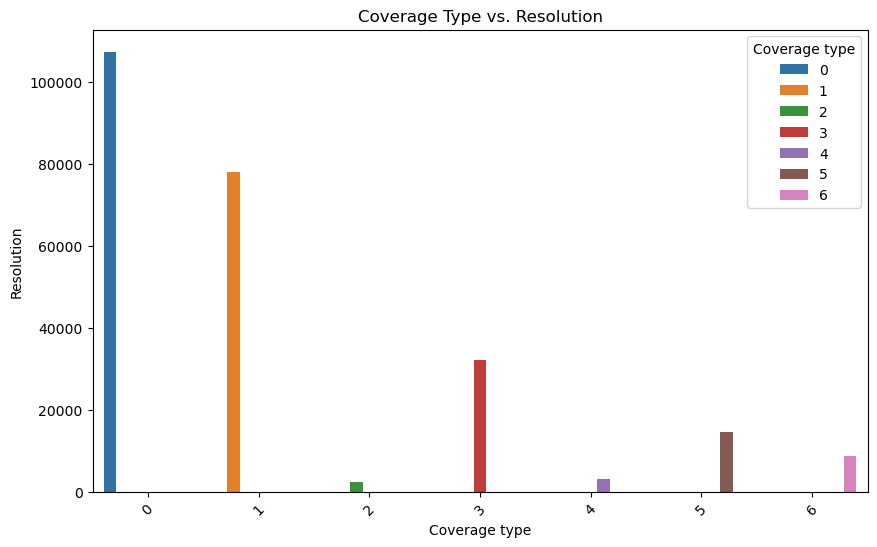

In [48]:
# Analyzing the impact of coverage type on resolution outcomes
plt.figure(figsize=(10, 6))
sns.countplot(x="Coverage type", hue="Coverage type", data=df)
plt.title("Coverage Type vs. Resolution")
plt.xticks(rotation=45)
plt.xlabel('Coverage type')
plt.ylabel('Resolution')
plt.show()

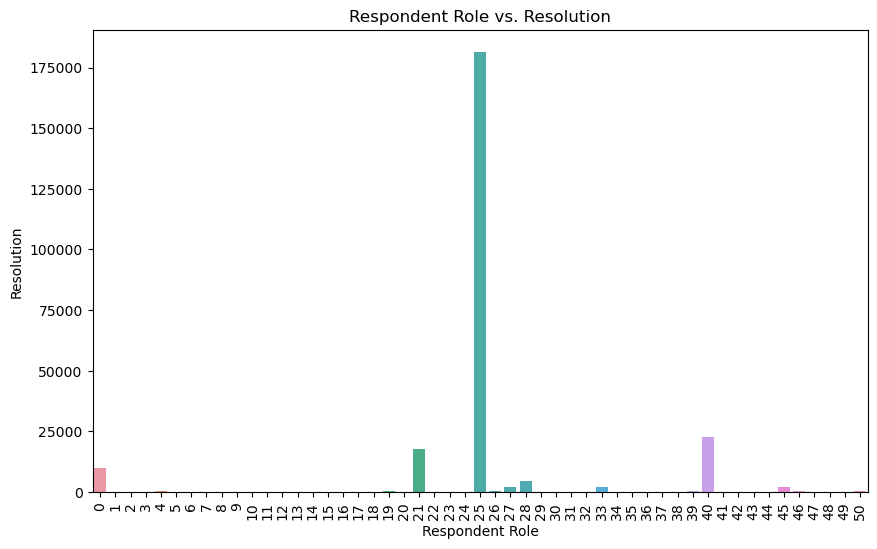

In [49]:
# Analyzing the impact of respondent role on resolution outcomes
plt.figure(figsize=(10, 6))
sns.countplot(x="Respondent Role", data=df)
plt.title("Respondent Role vs. Resolution")
plt.xticks(rotation=90)
plt.xlabel('Respondent Role')
plt.ylabel('Resolution')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


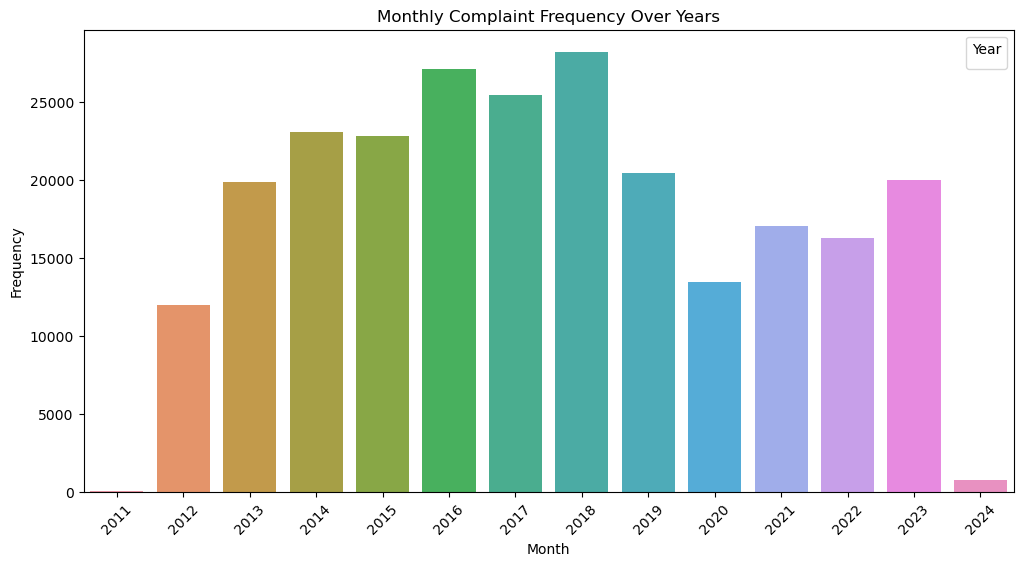

In [50]:
# Visualizing monthly complaint frequency over the years
complaint_frequency = df.groupby("Received date_month_year").size()
plt.figure(figsize=(12, 6))
sns.countplot(x="Received date_year", data=df)
plt.title("Monthly Complaint Frequency Over Years")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()

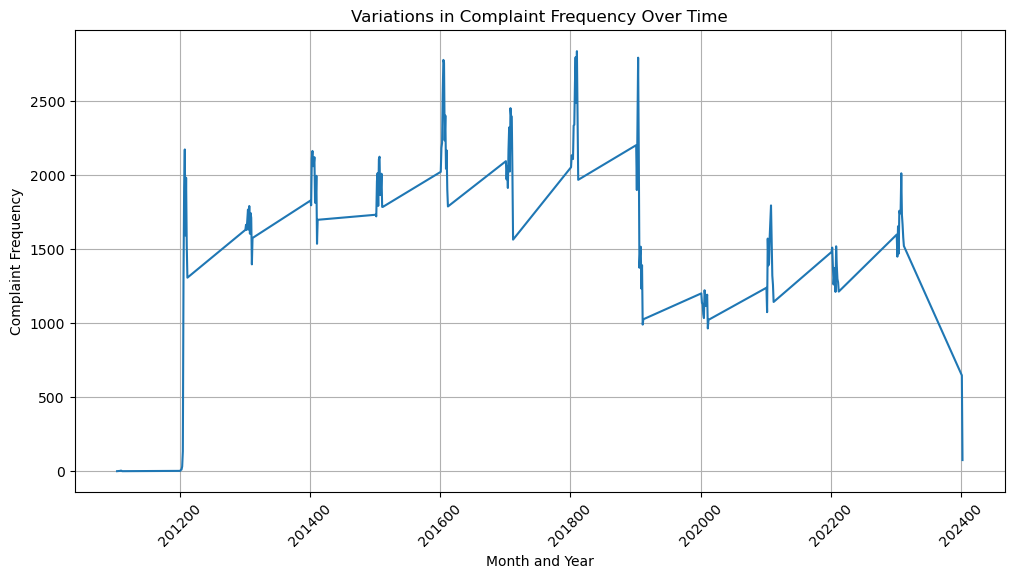

In [51]:
# Aggregate complaint frequency by month and year
complaint_frequency = df.groupby("Received date_month_year").size()

# Plotting the variation in complaint frequency over time
plt.figure(figsize=(12, 6))
complaint_frequency.plot(kind='line')
plt.title("Variations in Complaint Frequency Over Time")
plt.xlabel("Month and Year")
plt.ylabel("Complaint Frequency")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

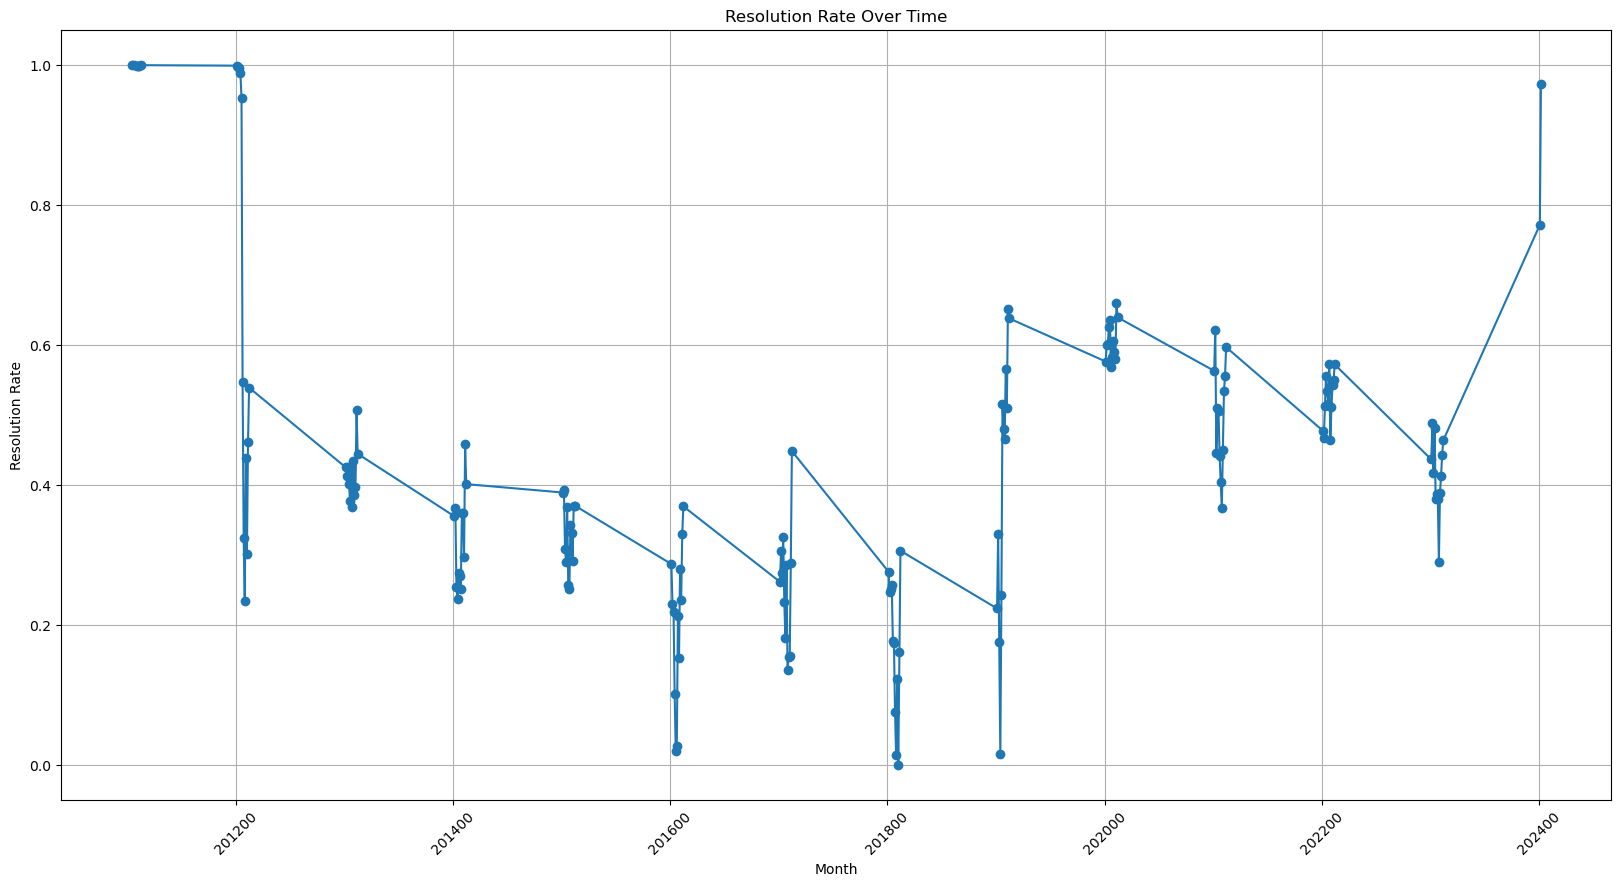

In [52]:
# Grouping data by "Received date_month_year" and "Complaint type" to calculate resolution rate
resolution_rate_df = df.groupby(["Received date_month_year", "Complaint type"]).size().unstack().fillna(0)

# Calculating resolution rate
resolution_rate_df["How resolved"] = 1 - (resolution_rate_df.sum(axis=1) / resolution_rate_df.sum(axis=1).max())

# Plotting resolution rate over time
plt.figure(figsize=(20, 10))
resolution_rate_df["How resolved"].plot(marker='o')
plt.title("Resolution Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Resolution Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()